## Chap 11. 통계에서 머신러닝으로

> 상관분석

In [1]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'C:/Users/victo/anaconda3/python/실습데이터/exam_sample_cor.csv'

#pandas 라이브러리의 read_csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


### 산점도: 연속형 변수

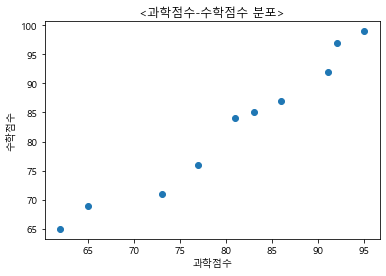

In [3]:
# font setting
plt.rc("font", family="Malgun Gothic")

# 두 연속형 변수 스캐터플롯 그리기, 산점도는 연속형 변수(x, y)에 유용함
plt.title("<과학점수-수학점수 분포>")
plt.xlabel("과학점수")
plt.ylabel("수학점수")
plt.scatter(df.science, df.math)

### 상관계수
- 연속형: pearson, 범주형: spearman

In [4]:
corr=df.corr()
corr

,student_no,science,english,math
student_no,1.000000,0.334156,0.180978,0.264716
science,0.334156,1.000000,0.976411,0.982180
english,0.180978,0.976411,1.000000,0.984986
math,0.264716,0.982180,0.984986,1.000000


>상관 시각화

<AxesSubplot:>

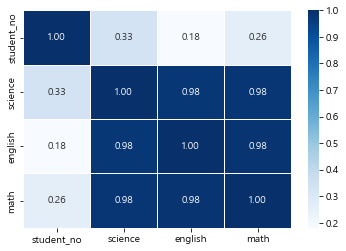

In [5]:
# 히트맵으로 상관도 시각화
sns.heatmap(data = df.corr() , annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

C:\Users\victo\AppData\Local\Temp\ipykernel_29588\3935174072.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df1, dtype=np.bool)
C:\Users\victo\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\victo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


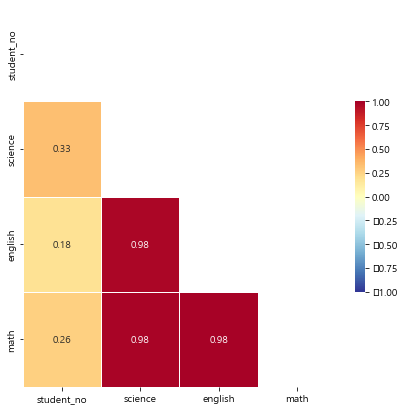

In [6]:
df1 = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 삼각형 True, 아래 삼각형 False)
mask = np.zeros_like(df1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df1, cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1 )  # 컬러바 범위 -1 ~ 1

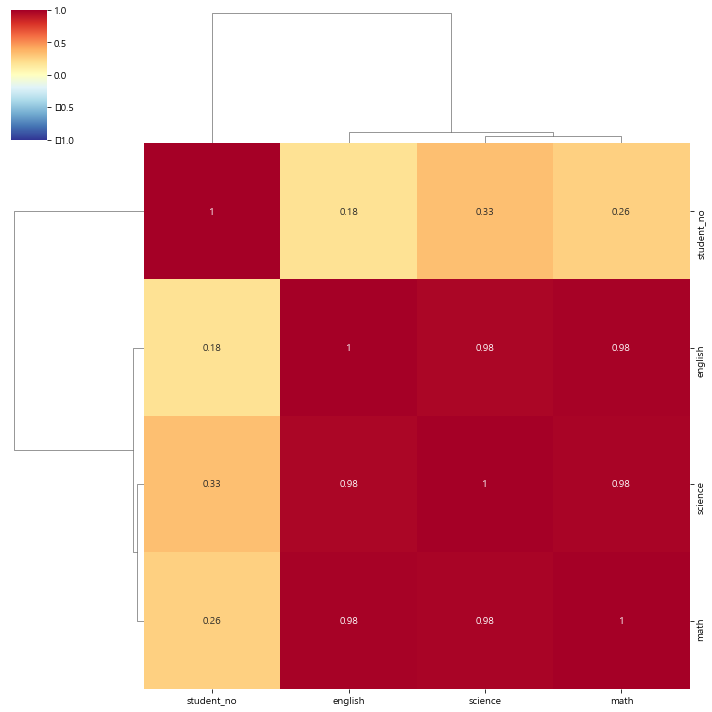

In [7]:
df1 = df.corr()
sns.clustermap(df1, annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

>단순 선형회귀

In [9]:
#판다스 라이브러리 불러오기
import pandas as pd 
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np    
import seaborn as sns 

#데이터불러오기
file_path= 'C:/Users/victo/anaconda3/python/실습데이터/exam_sample_cor.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,92,98,97,m
1,2,A,62,66,65,w
2,3,A,81,86,84,w
3,4,A,73,72,71,m
4,5,B,65,66,69,w
5,6,B,86,89,87,m
6,7,B,91,90,92,m
7,8,B,77,78,76,w
8,9,C,95,98,99,w
9,10,C,83,82,85,w


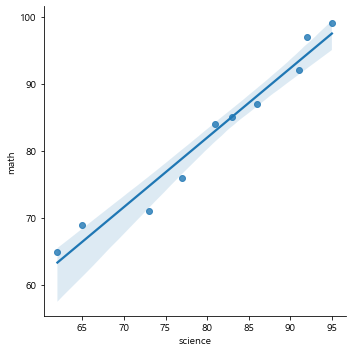

In [10]:
# sns의 lmplot활용(lm은 linear model)
sns.lmplot(x='science', y='math',data=df)

In [11]:
# 회귀분석을 위해 종속(Y=수학), 독립(X=과학)
# 과학점수를 알면 수학점수를 예상 할 수 있다. 
# 단순선형회귀 모형 
import statsmodels.api as sm
lin_reg = sm.OLS.from_formula("math ~ science", df).fit()  #종속 ~ 독립 변수 순서
lin_reg.summary()

C:\Users\victo\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 23 May 2022   Prob (F-statistic):           4.32e-07
Time:                        14:26:03   Log-Likelihood:                -21.673
No. Observations:                  10   AIC:                             47.35
Df Residuals:                       8   BIC:                             47.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7527      5.682     -0.132      0.898     -13.855      12.349
science        1.0342      0.070     14.781      0.000       0.873       1.196
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.811
Skew:                          -0.402   Prob(JB):                        0.667
Kurtosis:                       1.859   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>로지스틱(Logistic) 회귀 - 두가지의 값만 갖는 경우

C:\Users\victo\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


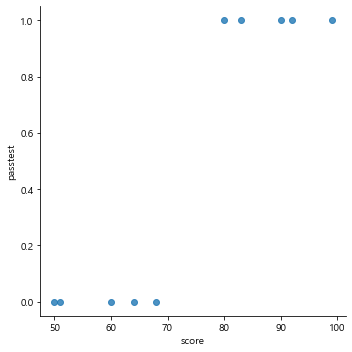

In [12]:
import pandas as pd           #판다스
import seaborn as sns          #시본 
import numpy as np           #넘파이

# DataFrame 생성
passtest = [0,0,0,0,0,1,1,1,1,1]
score = [51, 64, 60, 50, 68, 80, 90, 92, 99,83]
df = pd.DataFrame({"passtest": passtest, "score": score, } )
df.head()

#상관분석
sns.lmplot(x='score', y='passtest',data=df, logistic=True)  #lmplot은 선형회귀

C:\Users\victo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


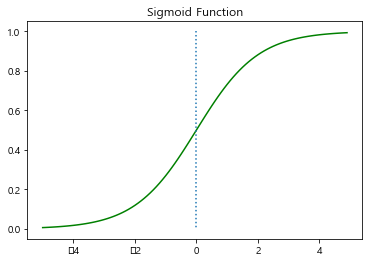

In [13]:
#  a는 1, b는 0임을 가정한 그래프입니다.
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

C:\Users\victo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


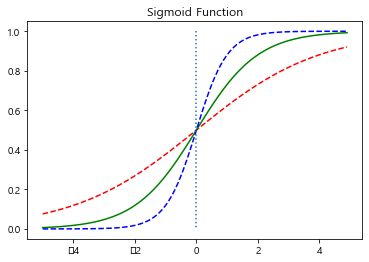

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)  #시그모이드 함수가 뭐지?
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

C:\Users\victo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


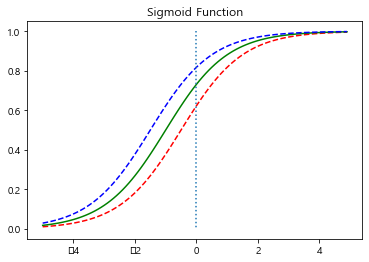

In [15]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()